<a href="https://colab.research.google.com/github/Mkthe2nd/Data-Science-For-Beginners/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
foodhub_orders = pd.read_csv('/content/drive/My Drive/Data Analytics_Data Science/MIT/Foundations of Data Science/foodhub_order.csv')
# returns the first 5 rows
foodhub_orders.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
- The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
- The rating column has orders that have not been rated.
- The Day of the Week is categorized in Weekend and Weekday

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
print(foodhub_orders.shape)
print(f"There are {foodhub_orders.shape[0]} rows and {foodhub_orders.shape[1]} columns ")

(1898, 9)
There are 1898 rows and 9 columns 


#### Observations:
- There are 1,898 rows and 9 columns in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
print(foodhub_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:
- The columns 'Order ID', 'Customer ID', 'Cost of Order', 'Food Preparation Time', and 'Delivery Time' are of numeric data type.
- The column 'Day of the Week' is categorical data with data type 'object'.
- The column 'Rating' is classified as an object data type, containing rating figures in string format.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
print(foodhub_orders.isna().sum())
print(f"The total number of NaN values in the data set: {foodhub_orders.isna().sum().sum()}")

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
The total number of NaN values in the data set: 0


#### Observations:
- There are no missing values in the data set

> Add blockquote




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
print(foodhub_orders.describe(include='all'))

            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN

#### Observations:
- There are 178 restaurants recorded in the dataset, with the most common being Shake Shack, appearing 219 times out of 1,898 rows.
- There are 14 unique cuisine types, with American being the most common, appearing 584 times.
- The average cost of an order is 16.49 with the lowest cost being 4.47 and the highest cost being 35.41.
- Half of the orders have a cost above 14 and three-quarters of the orders have a cost above 22.
- The weekend has the highest number of orders.
- There are 736 orders without a rating.
- The average food preparation time is 27.37 minutes, with a minimum of 20 minutes and a maximum of 35 minutes.
- The average delivery time is 24 minutes, with a minimum of 15 minutes and a maximum of 33 minutes.

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here

print(foodhub_orders['rating'].value_counts())

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:
- 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

### Order ID

In [ ]:
#Number of unique orders
foodhub_orders['order_id'].nunique()

1898

#### Observation
- There are 1,898 unique orders in the dataset

### Customer ID

In [ ]:
foodhub_orders['customer_id'].nunique()

1200

In [ ]:
#Top 5 repeat customser and the number of the orders
foodhub_orders['customer_id'].value_counts().head()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

#### Observation
- There are 1,200 unique customers implying that there are some repeat customers in the dataset
- The top 5 repeat customers have 13, 10, 9, 8, 7 orders respectively in the dataset

### Restaurant name

In [ ]:
#Number of uniques restaurants
foodhub_orders['restaurant_name'].nunique()

178

In [ ]:
#Top 5 restuarants
foodhub_orders['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

####Observations
- There are 178 unique restaurants in the dataset
- The top 5 most ordered restaurants in the dataset are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### Cuisine type

In [ ]:
foodhub_orders['cuisine_type'].nunique()

14

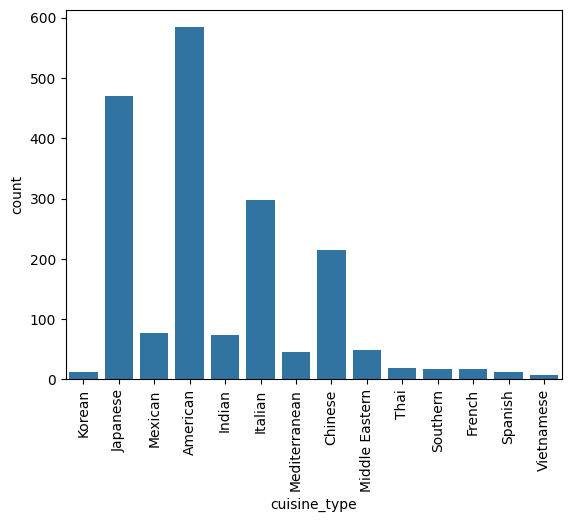

In [ ]:
sns.countplot(data=foodhub_orders, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

####Observations
- There are 14 unique cuisine types.
- The cuisine types with the most orders are, in descending order: American, Japanese, Italian, and Chinese.
- The cuisine type with the least orders is Vietnamese





### Cost or the Order

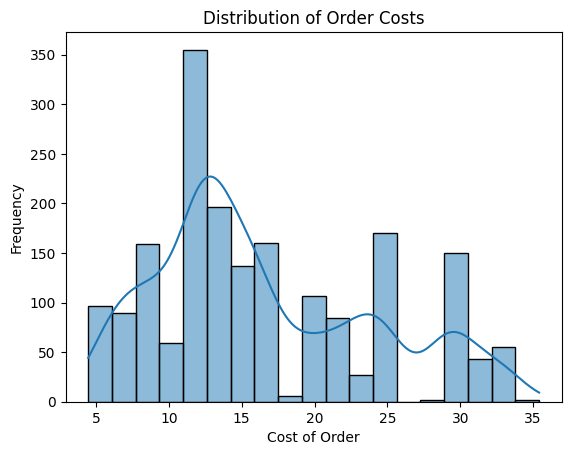

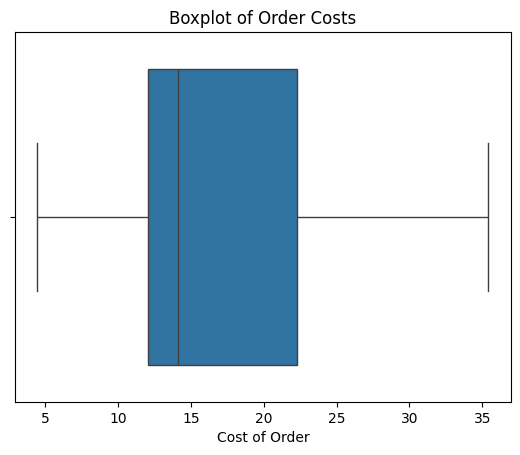

In [ ]:
## Histogram for the cost of order
sns.histplot(data=foodhub_orders,x='cost_of_the_order', kde=True)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of Order')
plt.ylabel('Frequency')
plt.show()

## Boxplot for the cost of order
sns.boxplot(data=foodhub_orders,x='cost_of_the_order')
plt.title('Boxplot of Order Costs')
plt.xlabel('Cost of Order')
plt.show()

#### Observations
- The cost of orders exhibits a trimodal distribution, with peaks observed between 10-15, 20-25, and a smaller peak at 30.
- The median cost is approximately 14, and the interquartile range spans from 12 to 22.

### Day of the Week


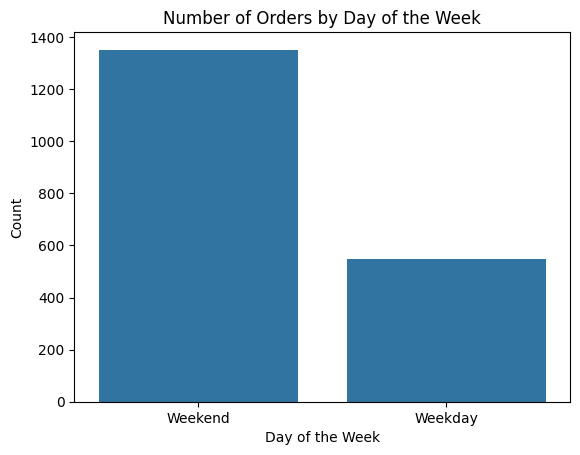

In [ ]:
sns.countplot(data=foodhub_orders, x='day_of_the_week')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

####Observations
- There are more orders made on Weekends than those made on weekdays

### Ratings


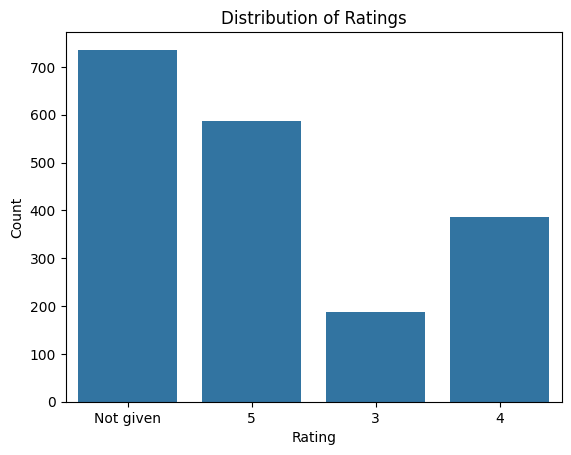

In [ ]:
sns.countplot(data=foodhub_orders, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

####Observations
- Most rated orders have a rating of 5.

### Food Preparation Time

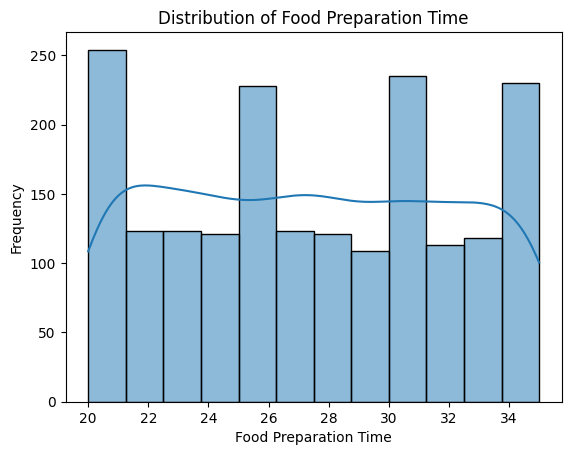

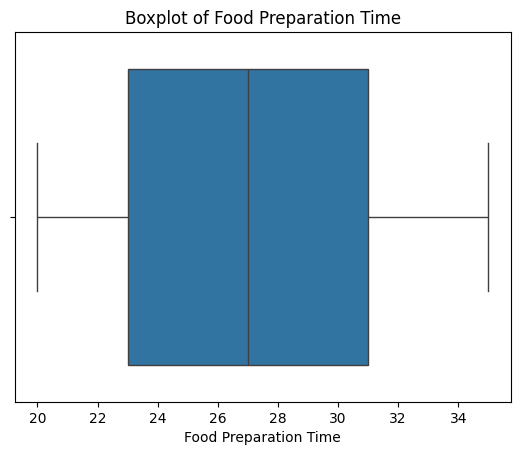

In [ ]:
# Histogram for food preparation time
sns.histplot(data=foodhub_orders, x='food_preparation_time', kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
plt.show()

# Boxplot for food preparation time
sns.boxplot(data=foodhub_orders, x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.show()

#### Observations
- The preparation time exhibits a fairly even distribution.
- The median preparation time is approximately 27 minutes.
- The interquartile range spans from 23 to 31 minutes.

### Delivery Time

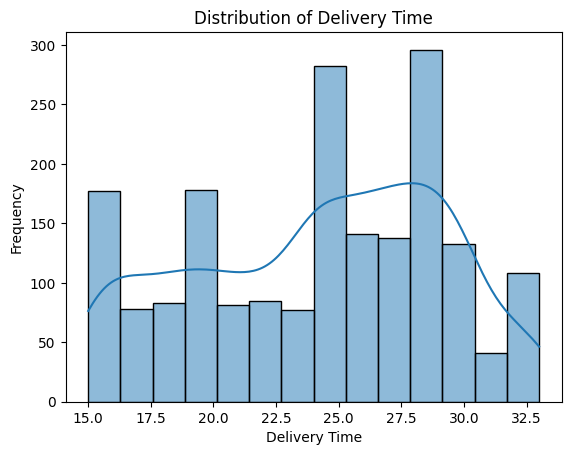

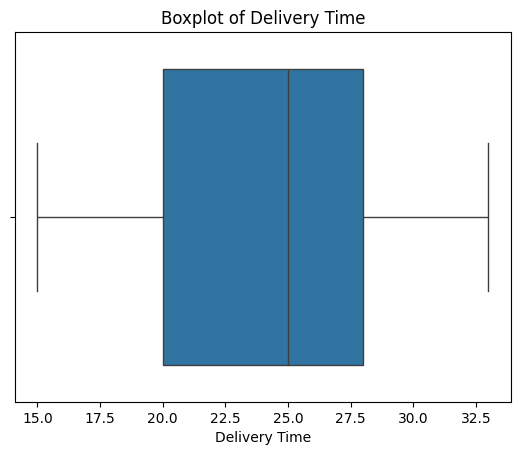

In [ ]:
# Histogram for delivery time
sns.histplot(data=foodhub_orders, x='delivery_time', kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

# Boxplot for delivery time
sns.boxplot(data=foodhub_orders, x='delivery_time')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()

#### Observations
- The distribution of delivery time depicts a peak ranging from 25 minutes to about 28 minutes.
- The median delivery time is 25 minutes.
- The interquartile range spans from 20 minutes to 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
restaurant_order_counts = foodhub_orders['restaurant_name'].value_counts()
print(restaurant_order_counts.head())


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
- Among the recorded restaurants, the top 5 in terms of the number of orders received are:
 - Shake Shack with 219 orders.
 - The Meatball Shop with 132 orders.
 - Blue Ribbon Sushi with 119 orders.
 - Blue Ribbon Fried Chicken with 96 orders.
 - Parm with 68 orders.






### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
foodhub_orders_weekend = foodhub_orders[foodhub_orders['day_of_the_week'] == 'Weekend']
count_of_pop_weekend_cuisine = foodhub_orders_weekend['cuisine_type'].value_counts()
print(count_of_pop_weekend_cuisine.head(1))

cuisine_type
American    415
Name: count, dtype: int64


#### Observations:
- The most popular cuisine type on the Weekend is American

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
foodhub_orders['cost_of_the_order'].apply(lambda x: 'Greater than 20 dollars' if x > 20 else 'Less than or equal to 20 dollars').value_counts(normalize=True) * 100

cost_of_the_order
Less than or equal to 20 dollars    70.758693
Greater than 20 dollars             29.241307
Name: proportion, dtype: float64

#### Observations:
- About 29.24% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
mean_delivery_time = round(foodhub_orders['delivery_time'].mean(), 2)
print(mean_delivery_time)

24.16


#### Observations:
The mean delivery time of orders is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
print(foodhub_orders['customer_id'].value_counts().head(3))

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
- The company has decided to offer 20% discount vouchers to its top 3 most frequent customers.
- The customer with ID 52832 placed the highest number of orders, totalling 13 orders.
- The customer with ID 47440 follows closely with 10 orders.
Customer ID 83287 is the third most frequent customer with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

### Cuisine vs Cost of the order

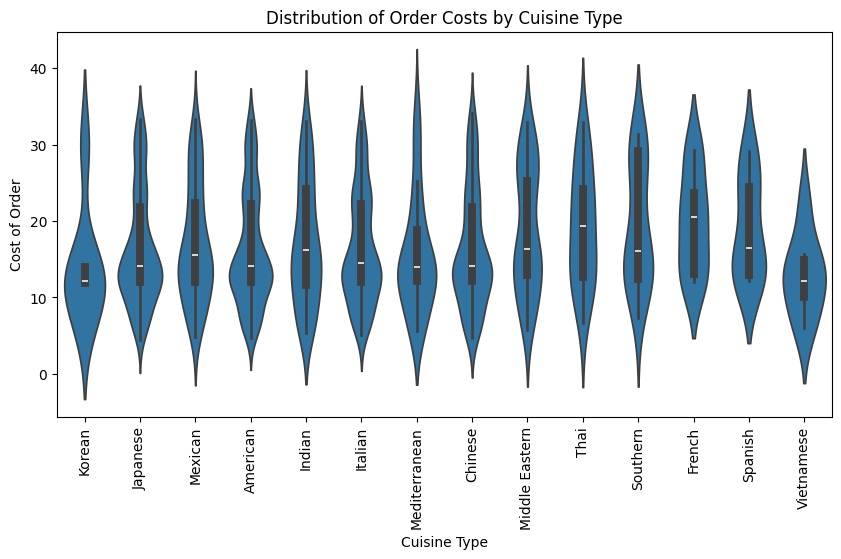

In [ ]:
# Write the code here
plt.figure(figsize=(10, 5))
sns.violinplot(x="cuisine_type", y="cost_of_the_order", data=foodhub_orders)
plt.title('Distribution of Order Costs by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.xticks(rotation=90)
plt.show()

####Observations
- The top 3 cuisine types with the lowest IQR range in descending order are Mediterranean, Vietnamese, and Korean.
- The cuisine type with the highest IQR is Southern.
- The highest median cost is observed in the French cuisine type, approximately 21, followed by Thai cuisine, while the lowest median cost is observed in Vietnamese cuisine.
- The distribution of costs for most cuisine types is clustered around 10 to 20.
- Both French and Spanish cuisine types have minimum costs higher than those of the other cuisine types.

### Cuisine vs Food Preparation time

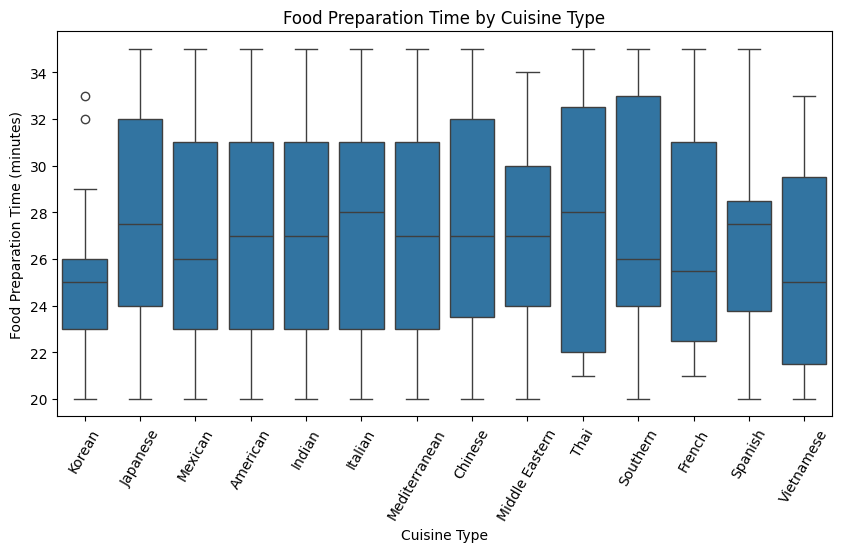

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="cuisine_type", y="food_preparation_time", data=foodhub_orders)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=60)
plt.show()

####Observations
- Korean cuisine has the narrowest preparation time IQR range, from 23 to 26 minutes, followed by Spanish cuisine.
- Thai cuisine, on the other hand, exhibits the widest preparation time IQR range, spanning from 22 to 32 minutes.

###Day of the Week vs Delivery Time

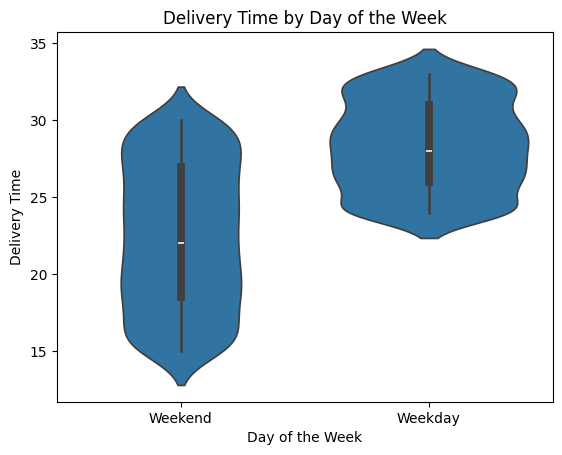

In [ ]:
sns.violinplot(x="day_of_the_week", y="delivery_time", data=foodhub_orders)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

####Observations
- Orders on weekdays generally have shorter delivery times than orders on weekends.
- The Interquartile Range (IQR) of delivery times on weekends ranges from about 18 to 27 minutes.
- In contrast, the IQR of delivery times on weekdays spans from 26 to 32 minutes.


### Delivery Time vs Cuisine Type vs Day of the Week



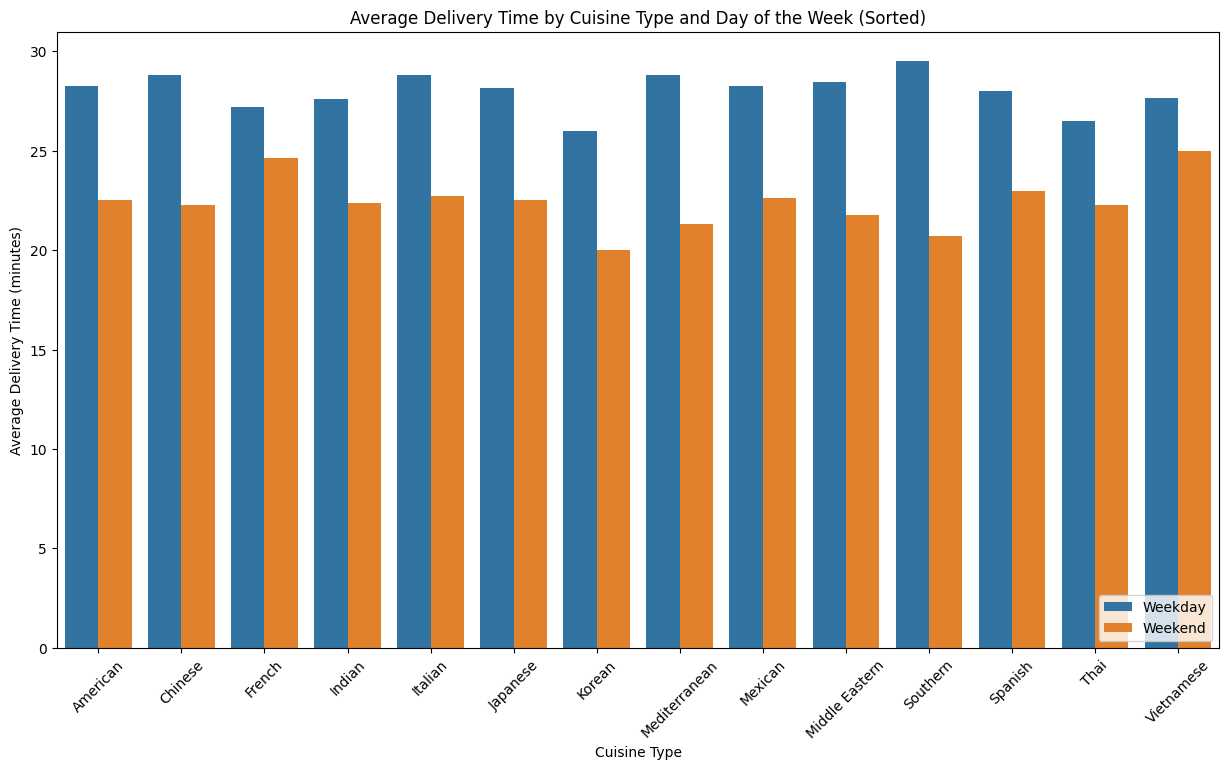

In [ ]:
avg_delivery_time_by_cuisine_day = foodhub_orders.groupby(['cuisine_type', 'day_of_the_week'])['delivery_time'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='cuisine_type', y='delivery_time', hue='day_of_the_week', data=avg_delivery_time_by_cuisine_day)
plt.title('Average Delivery Time by Cuisine Type and Day of the Week (Sorted)')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.legend(loc='lower right')
plt.show()

### Total Revenue by Cuisine Type

In [ ]:
sum_cost_by_cuisine = foodhub_orders.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
print(sum_cost_by_cuisine)

      cuisine_type  cost_of_the_order
0         American            9530.78
1         Japanese            7663.13
2          Italian            4892.77
3          Chinese            3505.62
4          Mexican            1303.85
5           Indian            1235.14
6   Middle Eastern             922.21
7    Mediterranean             711.84
8             Thai             364.95
9           French             356.29
10        Southern             328.11
11         Spanish             227.93
12          Korean             182.02
13      Vietnamese              90.18


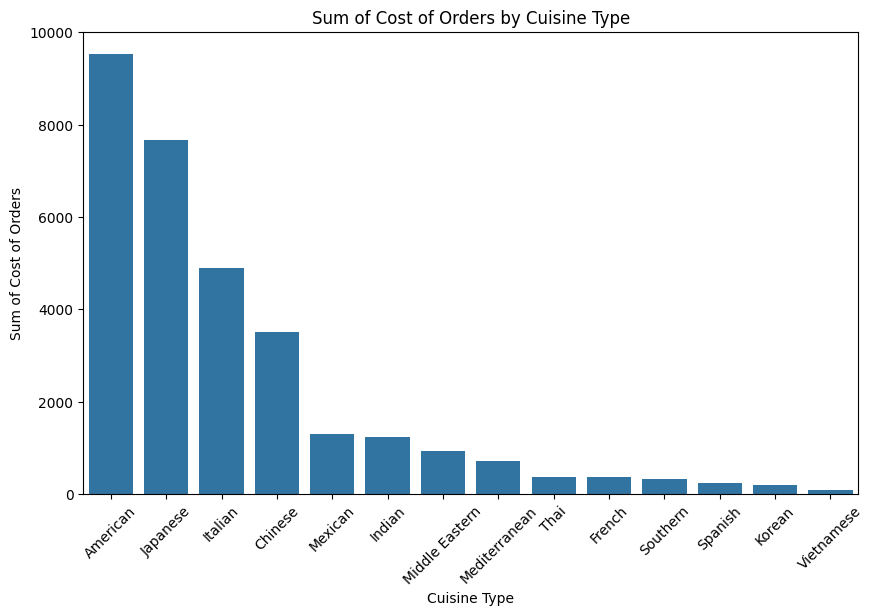

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=sum_cost_by_cuisine, x='cuisine_type', y='cost_of_the_order')
plt.title('Sum of Cost of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Sum of Cost of Orders')
plt.xticks(rotation=45)
plt.show()

#### Observations
- The sum of the cost of orders varies significantly across different cuisine types.
- American cuisine has the highest total cost of orders, amounting to \$ 9530.78, followed by Japanese cuisine with $ 7663.13.
- Vietnamese cuisine has the lowest total cost of orders, totaling only \$ 90.18. - American and Japanese cuisines are the most popular among customers, while Vietnamese cuisine appears to be less frequently ordered.


### Top 10 Revenues by Restaurant

In [ ]:
foodhub_orders.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

#### Observations
- The top 10 restaurants generating the highest revenues from orders are led by Shake Shack, with a total revenue of \$ 3579.53, followed by The Meatball Shop with \$ 2145.21.
- Other notable restaurants in the top 10 list include Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.







###Correlation among Numrical Variables

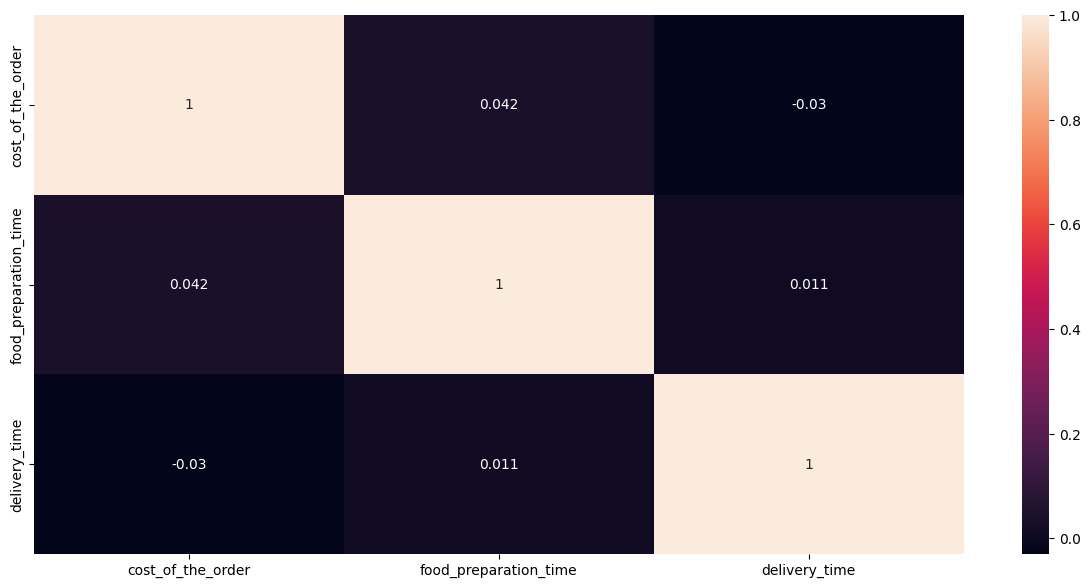

In [ ]:
numeric_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(foodhub_orders[numeric_cols].corr(), annot=True)
plt.show()

#### Observations
- Delivery time and Cost of order: There's a slight connection where if delivery takes longer, the cost of the order might be a bit lower, but it's not a strong link.
- Food Preparation time and Cost of order: If it takes longer to prepare the food, the cost of the order might go up a bit, but again, it's not a strong connection.
- Delivery time and Food preparation time: When delivery takes longer, the food preparation time might also increase a bit, but once more, it's not a strong connection.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
# Convert 'Not given' ratings to NaN and convert 'rating' column to float
foodhub_orders_ratings = foodhub_orders.replace('Not given', np.nan)
foodhub_orders_ratings['rating'] = foodhub_orders_ratings['rating'].astype(float)

# Group by restaurant and calculate count and mean of ratings
mean_rating_per_restaurant = foodhub_orders_ratings.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants based on the criteria: count > 50 and mean > 4
promotional_restaurants = mean_rating_per_restaurant[(mean_rating_per_restaurant['count'] > 50) &
                                                     (mean_rating_per_restaurant['mean'] > 4)]
promotional_restaurants_sorted = promotional_restaurants.sort_values('count', ascending=False)
print(promotional_restaurants_sorted.head(10))


                           count      mean
restaurant_name                           
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905
Blue Ribbon Sushi             73  4.219178
Blue Ribbon Fried Chicken     64  4.328125


#### Observations:
The top four restaurants eligible for the promotional offer are as follows:
- Shake Shack with 133 ratings and an average rating of approximately 4.28.
- The Meatball Shop with 84 ratings and an impressive average rating of around 4.51.
- Blue Ribbon Sushi with 73 ratings and an average rating of about 4.22.
- Blue Ribbon Fried Chicken with 64 ratings and an average rating of around 4.33.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
def commission_charges(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0
foodhub_orders['commission'] = foodhub_orders['cost_of_the_order'].apply(commission_charges)


net_revenue = foodhub_orders['commission'].sum()
print(net_revenue)

6166.303


#### Observations:
- The net revenue generated by the company across all orders is \$6166.303.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
foodhub_orders['total_time_to_deliver'] = foodhub_orders['food_preparation_time'] + foodhub_orders['delivery_time']

# Filter to include only orders with a total time to deliver greater than 60 minutes
orders_greater_than_60_min = foodhub_orders[foodhub_orders['total_time_to_deliver'] > 60]

# Percentage of orders that take more than 60 minutes to deliver
percentage_greater_than_60_min = (len(orders_greater_than_60_min) / len(foodhub_orders)) * 100

print("Percentage of orders taking more than 60 minutes to deliver: ", round(percentage_greater_than_60_min, 2), "%")

Percentage of orders taking more than 60 minutes to deliver:  10.54 %


#### Observations:
- The percentage of orders taking more than 60 minutes to deliver is 10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
mean_delivery_time_by_day = foodhub_orders.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_time_by_day)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


####Observattions
- On weekdays, the average delivery time is approximately 28.34 minutes, while on weekends, it decreases to approximately 22.47 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Data Overview:
 - The dataset comprises 1,898 rows and 9 columns, with each row representing an order placed by a customer.
 - Numeric data types include 'Order ID' and 'Customer ID'. Also, 'Cost of Order', 'Food Preparation Time', and 'Delivery Time'.
 - 'Day of the Week' is categorized into Weekend and Weekday.
 - The 'Rating' column contains orders that have not been rated.

* Customer Behavior:
 - Most orders are made on weekends. This shows higher demand on leisure days.
 - About 39% of orders are not rated. This suggests a place to improve feedback collection.
 - The top 3 most frequent customers have placed 13, 10, and 9 orders. This shows they have a loyal customer base.
* Restaurant and Cuisine Insights:
 - Shake Shack is the most ordered restaurant. It is followed by The Meatball Shop and Blue Ribbon Sushi.
 - American cuisine is the most popular, followed by Japanese, Italian, and Chinese.
 - Mediterranean, Vietnamese, and Korean cuisines have the lowest Interquartile Range (IQR) in prep time. In contrast, Southern cuisine has the highest IQR.

* Revenue and Promotions:
 - Shake Shack makes the most revenue. It is followed by The Meatball Shop and Blue Ribbon Sushi.
 - The company offers discounts to restaurants with rating counts over 50. They must also have average ratings above 4. Top eligible restaurants include Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

* Financial Analysis:
 - The net revenue generated by the company across all orders amounts to \$6166.303.
 - The company applies a commission of 25% on orders above $20 and 15% on orders above \$5.

* Delivery Performance:
 - Approximately 10.54% of orders take more than 60 minutes for delivery.
 - Weekday deliveries take longer. They average 28.34 minutes, while weekends average 22.47 minutes.

### Recommendations:

1.  Improve Feedback Collection: Encourage customers to rate their orders. Offer incentives or discounts for providing feedback. This will help gather valuable insights for enhancing service quality.

2. Optimize Delivery Operations: Simplify delivery processes to cut delivery times. This is especially true on weekdays when times are the longest. Consider hiring more delivery personnel during peak hours to meet demand efficiently.

3. Improve Customer Engagement. Offer loyal customers personalized discounts or rewards. This will foster brand loyalty.

4. Maximize Revenue Opportunities: Offer special promotions or meal deals during slow hours. This will boost sales and make the restaurant more profitable.

5. Monitor Performance Metrics. Continuously check key metrics, such as order volume, customer ratings, and delivery times. Use data-driven insights to identify areas for improvement and implement corrective actions promptly.

---